In [1]:
import sys
import os
sys.path.append(os.path.abspath("../")) #Add parent directory

In [2]:
# import torch
# import nibabel as nib
# import os
# import numpy as np

## Load data

In [3]:
from Modular_DL.data_loading import load_nifti, resample_image, convert_to_ras
from Modular_DL.data_normalization import z_score_normalize
import numpy as np
import SimpleITK as sitk

In [4]:
# folder_path = r"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Final_project\TrainingValidationTestSets\Training_Set".replace("\\", "/")


# output_folder = r"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Final_project\TrainingValidationTestSets\Training_resampled".replace("\\", "/")
# os.makedirs(output_folder, exist_ok= True)
# #target spacing for now: 1,1,1
# target_spacing = (1.0, 1.0, 1.0)
# reference_shape = None
# reference_affine = None
# consistent = True

# for root, _, files in os.walk(folder_path):
#     for file in files:
#         if file.endswith(".nii") or file.endswith(".nii.gz"):
#             file_path = os.path.join(root, file).replace("\\", "/")

#             # Load original image
#             data, original_image, voxel_spacing = load_nifti(file_path)

#             # Create a SimpleITK image
#             image_sitk = sitk.GetImageFromArray(data)
#             image_sitk.SetSpacing(voxel_spacing)  # Set the original spacing
#             image_sitk.SetDirection(original_image.GetDirection())  # Copy original direction
#             image_sitk.SetOrigin(original_image.GetOrigin())  # Copy original origin

#             # Resample the image
#             is_label = 'seg' in file.lower()  # Determine if the file is a label (segmentation)
#             resampled_image = resample_image(image_sitk, target_spacing, is_label=is_label)

#             # Convert to RAS orientation
#             resampled_image = convert_to_ras(resampled_image)

#             # Save the resampled image
#             output_file_path = os.path.join(output_folder, f"resampled_{file}")
#             sitk.WriteImage(resampled_image, output_file_path)

#             print(f"Processed and saved: {output_file_path}")



            


# Trial for reading the images

In [5]:
from Modular_DL.data_loader_dl import Dataloader_2D
from torch.utils.data import DataLoader
data_folder = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Final_project\TrainingValidationTestSets\Training_resampled".replace("\\", "/")
image_files = ["TrainingImg/resampled_IBSR_01.nii.gz", "TrainingImg/resampled_IBSR_03.nii.gz", "TrainingImg/resampled_IBSR_04.nii.gz","TrainingImg/resampled_IBSR_05.nii.gz", "TrainingImg/resampled_IBSR_09.nii.gz"]
label_files = ["TrainingLabel/resampled_IBSR_01_seg.nii.gz", "TrainingLabel/resampled_IBSR_03_seg.nii.gz", "TrainingLabel/resampled_IBSR_04_seg.nii.gz", "TrainingLabel/resampled_IBSR_05_seg.nii.gz", "TrainingLabel/resampled_IBSR_09_seg.nii.gz"]

image_files_val = ["TrainingImg/resampled_IBSR_06.nii.gz", "TrainingImg/resampled_IBSR_07.nii.gz"]
label_files_val = ["TrainingLabel/resampled_IBSR_06_seg.nii.gz", "TrainingLabel/resampled_IBSR_07_seg.nii.gz"]

dataset_train = Dataloader_2D(data_folder, image_files, label_files)
dataloader_train = DataLoader(dataset_train, batch_size = 1, shuffle = True, num_workers=0)

dataset_val = Dataloader_2D(data_folder, image_files_val, label_files_val)
dataloader_val = DataLoader(dataset_val, batch_size = 1, shuffle = False, num_workers=0)


In [ ]:
for batch_idx, (images, labels) in enumerate(dataloader_train):
    batch_size = images.shape[0]
    #print(f"\n Batch {batch_idx + 1}/{len(dataloader_train)}")
    
    for img_idx in range(batch_size):

        image = images[img_idx]
        label = labels[img_idx]
        zero_sum_slices = []
        for slice_idx in range(images.shape[1]):
            slice_sum = image[:, :, slice_idx].sum().item()
            if slice_sum == 0:
                zero_sum_slices.append(slice_idx)

        if zero_sum_slices:
            print(f"Warning Image  {img_idx + 1} in batch {batch_idx + 1}")

img tensor torch.Size([1, 192, 256])
label tensor torch.Size([192, 256])
Warning Image  1 in batch 1
img tensor torch.Size([1, 192, 240])
label tensor torch.Size([192, 240])
Warning Image  1 in batch 2
img tensor torch.Size([1, 192, 240])
label tensor torch.Size([192, 240])
Warning Image  1 in batch 3
img tensor torch.Size([1, 192, 240])
label tensor torch.Size([192, 240])
Warning Image  1 in batch 4
img tensor torch.Size([1, 192, 240])
label tensor torch.Size([192, 240])
Warning Image  1 in batch 5
img tensor torch.Size([1, 192, 240])
label tensor torch.Size([192, 240])
Warning Image  1 in batch 6
img tensor torch.Size([1, 192, 240])
label tensor torch.Size([192, 240])
Warning Image  1 in batch 7
img tensor torch.Size([1, 192, 256])
label tensor torch.Size([192, 256])
Warning Image  1 in batch 8
img tensor torch.Size([1, 192, 240])
label tensor torch.Size([192, 240])
Warning Image  1 in batch 9
img tensor torch.Size([1, 192, 240])
label tensor torch.Size([192, 240])
Warning Image  1 i

In [891]:
batch = next(iter(dataloader_train)) #Get one batch of data
images, labels = batch #unpack into images and labels

print(f"Batch size: {images.shape[0]}")
print(f"Image dimensions: {images.shape[1:]}")
print(f"Labels shape: {labels.shape}")

for idx in range(images.shape[0]):
    print(f"Image {idx+1}")
    print(f"    Shape: {images[idx].shape}")
    print(f"    Min pixel value: {images[idx].min().item()}")
    print(f"    Max pixel value: {images[idx].max().item()}")
    print(f"    Data type: {images[idx].dtype}")

Batch size: 1
Image dimensions: torch.Size([1, 192, 256])
Labels shape: torch.Size([1, 192, 256])
Image 1
    Shape: torch.Size([1, 192, 256])
    Min pixel value: 0.0
    Max pixel value: 0.0
    Data type: torch.float32


# Vanilla Unet

In [468]:
import torch
import torch.optim as optim
from Modular_DL.vanilla_unet import UNet2D
from Modular_DL.loss_function import dice_loss
from Modular_DL.metrics import dice_coefficient
from Modular_DL.plot_losses import plot_losses
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = UNet2D(in_channels=1, out_channels=4).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [469]:
num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    #Training

    model.train()
    total_train_loss = 0
    total_train_dice = 0

    for images, labels in dataloader_train:

        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = dice_loss(outputs, labels)

        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(dataloader_train)
    train_losses.append(avg_train_loss)

    #Testing

    model.eval()
    total_val_loss = 0

    with torch.no_grad():
        for images, labels in dataloader_val:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_loss = dice_loss(outputs, labels)
            total_val_loss += val_loss.item()
        
        avg_val_loss = total_val_loss / len(dataloader_val)
        val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1} / {num_epochs}, Train Loss {avg_train_loss:.4f}, Val Loss {avg_val_loss:.4f}")

plot_losses(train_losses, val_losses)


KeyboardInterrupt: 

# Qualitative test the model

In [46]:
import nibabel as nib
import torch.nn.functional as F
import matplotlib.pyplot as plt
def preprocess_image(image_path):

    image_nii = nib.load(image_path)
    image_data = image_nii.get_fdata(dtype=np.float32)
    image_tensor = torch.tensor(image_data, dtype=torch.float32).unsqueeze(0).unsqueeze(0) #adds batch and channel dims
    return image_tensor, image_nii

def postprocess_prediction(pred):
    pred_softmax = F.softmax(pred)
    segmentation = torch.argmax(pred_softmax, dim=1).squeeze(0)
    return segmentation.cpu().numpy()

def dice_coefficient_test(pred, target, epsilon=1e-6):
    """
    Compute the Dice coefficient.
    Args:
        pred: Predicted segmentation map (H, W).
        target: Ground truth segmentation map (H, W).
    Returns:
        Dice coefficient.
    """
    pred = torch.tensor(pred, dtype=torch.float32)
    target = torch.tensor(target, dtype=torch.float32)

    intersection = (pred * target).sum()
    union = pred.sum() + target.sum()

    dice = (2.0 * intersection + epsilon) / (union + epsilon)
    return dice.item()

def visualize_segmentation(image_nii, segmentation, output_path=None):
    """
    Visualize the segmentation overlaid on the original image.
    Args:
        image_nii: Nibabel object of the original image.
        segmentation: Predicted segmentation map (H, W).
        output_path: Path to save the visualization (optional).
    """
    image = image_nii.get_fdata()
    slice_idx = image.shape[2] // 2  # Choose the middle slice for visualization

    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image[:, :, slice_idx], cmap="gray")

    # Segmentation
    plt.subplot(1, 2, 2)
    plt.title("Segmentation")
    plt.imshow(image[:, :, slice_idx], cmap="gray")
    plt.imshow(segmentation[:, :, slice_idx], alpha=0.5, cmap="jet")  # Overlay segmentation


In [47]:
# data_folder = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Final_project\TrainingValidationTestSets\Training_resampled".replace("\\", "/")

# image_files_test = ["TrainingImg/resampled_IBSR_06.nii.gz", "TrainingImg/resampled_IBSR_07.nii.gz"]
# label_files_test = ["TrainingLabel/resampled_IBSR_06_seg.nii.gz", "TrainingLabel/resampled_IBSR_07_seg.nii.gz"]

# dataset_test = Dataloader_2D(data_folder, image_files_test, label_files_test)
# dataloader_test = DataLoader(dataset_test, batch_size = 1, shuffle = False)

In [431]:
img_name = "TrainingImg/resampled_IBSR_06.nii.gz"
img_seg_name = "TrainingLabel/resampled_IBSR_06_seg.nii.gz"
test_folder = fr"C:\Users\User\Desktop\UDG_old_pc\UDG\Subjects\MISSSSSA\Final_project\TrainingValidationTestSets\Training_resampled".replace("\\", "/")
image_files_test = [img_name]
label_files_test = [img_seg_name]

dataset_test = Dataloader_2D(data_folder, image_files_test, label_files_test)
dataloader_test = DataLoader(dataset_test, batch_size = 1, shuffle = True)


In [432]:
dataloader_test

# Mover este dice a una funciòn para tests
Poner una restricciòn de que sì la suma de intensidades en la images real es de 0, no haga nada

In [ ]:

def dice_coefficient_test_r(pred, target, epsilon=1e-6):
    pred = pred.float()
    target = target.float()

    intersection = (pred * target).sum()
    union = pred.sum() + target.sum()

    dice = (2.0 * intersection + epsilon) / (union + epsilon)
    return dice.item()


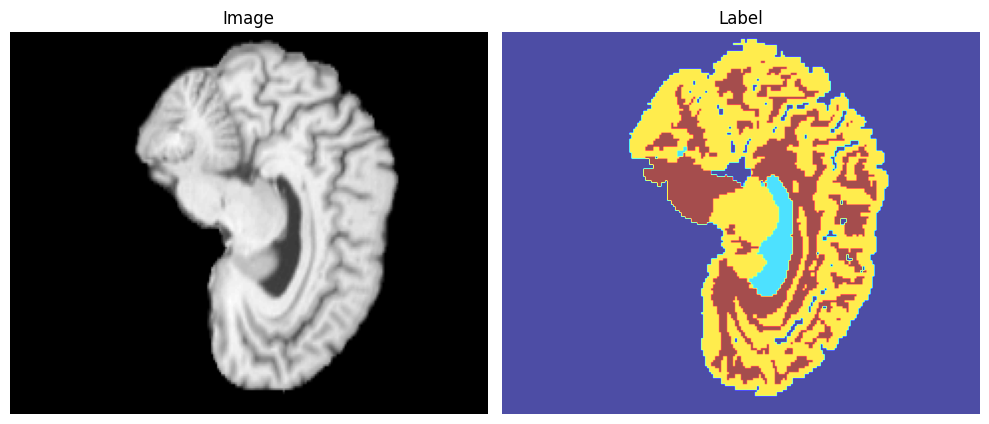

In [460]:
#40
batch = next(iter(dataloader_test))
images, labels = batch

images = images.to(device)
labels = labels.to(device)


image_display = images[0].squeeze(0).cpu().numpy()
labels_display = labels[0].cpu().numpy()



# Plot the image and label side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(image_display, cmap="gray")
plt.axis("off")

# Ground Truth / Label
plt.subplot(1, 2, 2)
plt.title("Label")
plt.imshow(labels_display, cmap="jet", alpha=0.7)
plt.axis("off")

plt.tight_layout()
plt.show()

# Revisar por què carajos estàn volteados los cerebros

Dice Score: 2.5658


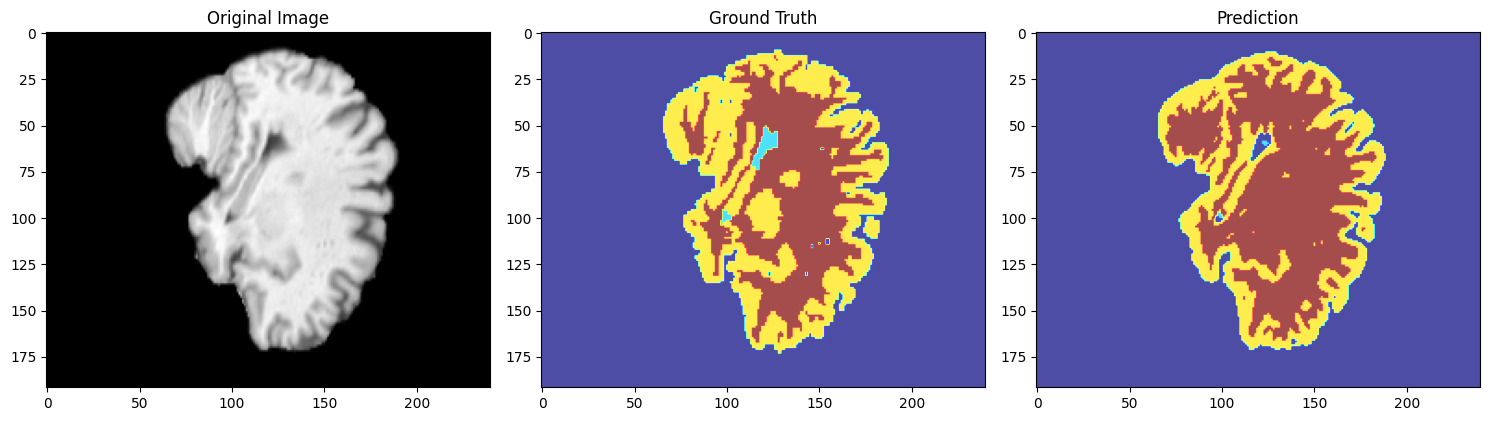

In [447]:
model.eval()
with torch.no_grad():
    pred = model(images)
    pred_softmax = F.softmax(pred, dim=1)
    pred_classes = torch.argmax(pred_softmax, dim=1).squeeze(0).cpu()

label_slice = labels.squeeze(0).cpu()

dice_score = dice_coefficient_test_r(pred_classes, label_slice)
print(f"Dice Score: {dice_score:.4f}")

# Visualize the image, ground truth, and prediction
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(images.squeeze().cpu().numpy(), cmap="gray")

# Ground Truth
plt.subplot(1, 3, 2)
plt.title("Ground Truth")
plt.imshow(label_slice.numpy(), cmap="jet", alpha=0.7)

# Prediction
plt.subplot(1, 3, 3)
plt.title("Prediction")
plt.imshow(pred_classes.numpy(), cmap="jet", alpha=0.7)

plt.tight_layout()
plt.show()

In [463]:
x,y,z = [1,2,3]
x

1